In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import glob
import random
import cv2

In [188]:
url = "../input/data/train/train.csv"
df = pd.read_csv(url)
df

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [190]:
df.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

In [191]:
df.columns

Index(['id', 'gender', 'race', 'age', 'path'], dtype='object')

### column별 value_counts 확인

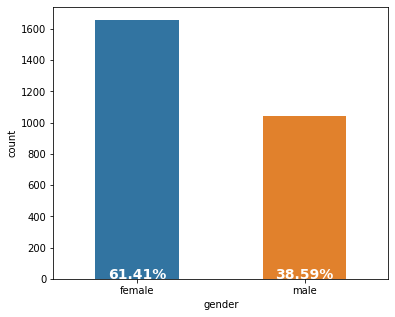

In [232]:
plt.figure(figsize=(6, 5))
axes = sns.countplot(x='gender', data=df, width=0.5)

counts = df['gender'].value_counts()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]

for i, v in enumerate(counts_pct):
    axes.text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

In [195]:
print(df['race'].value_counts())

Asian    2700
Name: race, dtype: int64


In [384]:
df.groupby('age').count()

,id,gender,race,path,age_range
age,,,,,
18,192,192,192,192,192
19,407,407,407,407,407
20,267,267,267,267,267
21,41,41,41,41,41
22,58,58,58,58,58
23,72,72,72,72,72
24,62,62,62,62,62
25,82,82,82,82,82
26,44,44,44,44,44


In [120]:
max(df['age']), min(df['age'])

(60, 18)

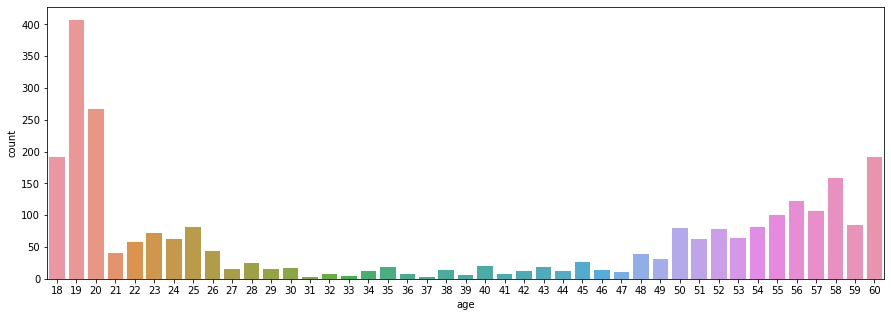

In [386]:
plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(x='age',data=df)

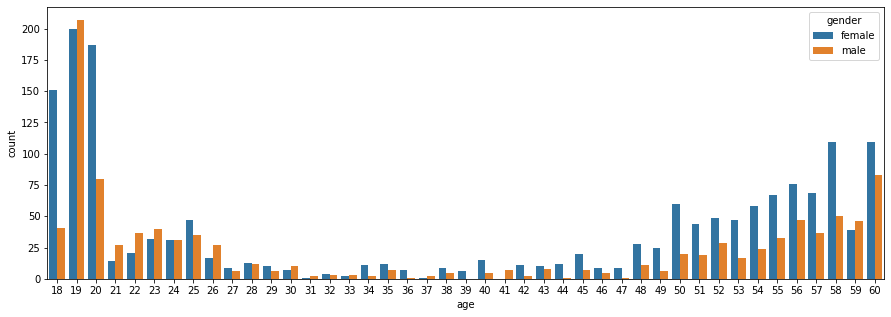

In [387]:
plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(x='age', hue='gender', data=df)

In [169]:
bins = [9, 19, 29, 39, 49, 59, 69, 79]
age_df = df['age'].value_counts(bins=bins, sort=False)
age_df

(8.999, 19.0]    599
(19.0, 29.0]     682
(29.0, 39.0]      95
(39.0, 49.0]     192
(49.0, 59.0]     940
(59.0, 69.0]     192
(69.0, 79.0]       0
Name: age, dtype: int64

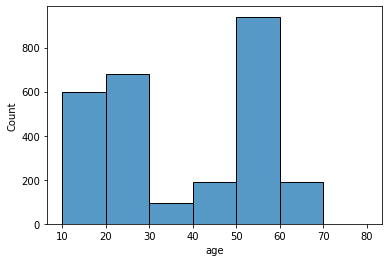

In [178]:
sns.histplot(df['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80])

In [196]:
def get_age_range(age):
    if age < 30:
        return 0
    elif 30 <= age < 60:
        return 1
    else:
        return 2

In [197]:
df['age_range'] = df['age'].apply(lambda x : get_age_range(x))

In [199]:
df.head()

,id,gender,race,age,path,age_range
0,000001,female,Asian,45,000001_female_Asian_45,1
1,000002,female,Asian,52,000002_female_Asian_52,1
2,000004,male,Asian,54,000004_male_Asian_54,1
3,000005,female,Asian,58,000005_female_Asian_58,1
4,000006,female,Asian,59,000006_female_Asian_59,1


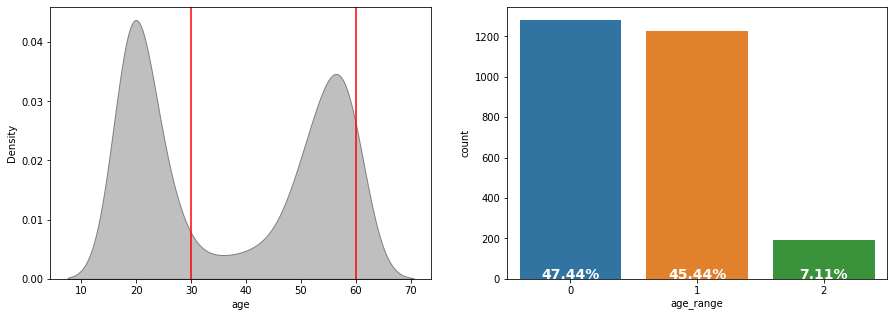

In [275]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(x="age", data=df, fill=True, alpha=0.5, ax=axes[0], color='gray')
axes[0].axvline(30, color='r')
axes[0].axvline(60, color='r')

sns.countplot(x="age_range", data=df, ax=axes[1])

counts = df['age_range'].value_counts()
counts_pct = [f'{elem * 100:.2f}%' for elem in counts / counts.sum()]

for i, v in enumerate(counts_pct):
    axes[1].text(i, 0, v, horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')

Text(0.5, 1.0, 'Age_range-Gender distribution')

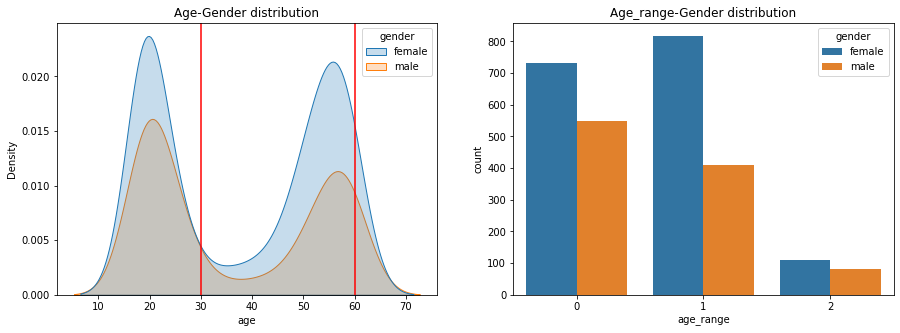

In [276]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

g1 = sns.kdeplot(data=df, x='age', hue='gender', fill=True, ax=axes[0])
g2 = sns.countplot(data=df, x='age_range', hue='gender', order=[0, 1, 2], ax=axes[1])

axes[0].set_title('Age-Gender distribution')
axes[0].axvline(30, color='r')
axes[0].axvline(60, color='r')

axes[1].set_title('Age_range-Gender distribution')

In [193]:
df.describe(include="all")

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,001554_female_Asian_27
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


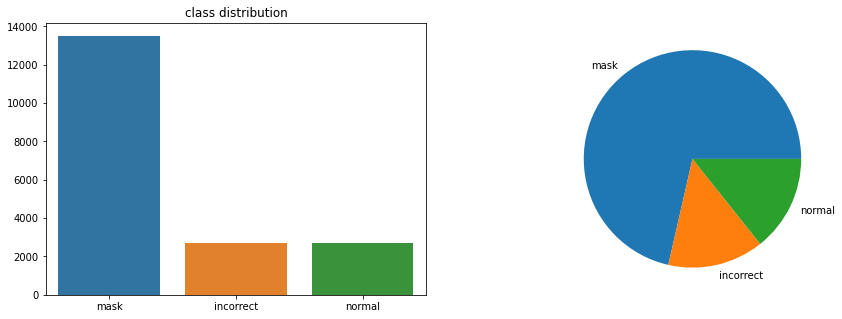

In [327]:
mask_labels = ['mask', 'incorrect', 'normal']
data = [len(df)*5, len(df)*1, len(df)*1]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=mask_labels, y=data, ax=axes[0])
axes[0].set_title('class distribution')

axes[1] = plt.pie(data, labels=mask_labels)

In [373]:
url = "../input/data/train/images/*/*"
train_data = glob.glob(url)

In [374]:
len(train_data)

18900

In [397]:
labels = [0] * len(train_data)
class_names = ['mask_male_0', 'mask_male_1', 'mask_male_2', 'mask_female_0', 'mask_female_1', 'mask_female_2', 
               'incorrect_male_0', 'incorrect_male_1', 'incorrect_male_2', 'incorrect_female_0', 'incorrect_female_1', 'incorrect_female_2',
               'normal_male_0', 'normal_male_1', 'normal_male_2', 'normal_female_0', 'normal_female_1', 'normal_female_2']

for i, data in enumerate(train_data):
    splited_data = data.split("/")
    name = splited_data[-1]
    gender = splited_data[-2].split("_")[1]
    age = int(splited_data[-2].split("_")[-1])
    
    if name[:4] == "mask":
        if gender == "male":
            if age < 30:
                labels[i] = 0
            elif 30 <= age < 60:
                labels[i] = 1
            else:
                labels[i] = 2
        else:
            if age < 30:
                labels[i] = 3
            elif 30 <= age < 60:
                labels[i] = 4
            else:
                labels[i] = 5
    elif name[:4] == "inco":
        if gender == "male":
            if age < 30:
                labels[i] = 6
            elif 30 <= age < 60:
                labels[i] = 7
            else:
                labels[i] = 8
        else:
            if age < 30:
                labels[i] = 9
            elif 30 <= age < 60:
                labels[i] = 10
            else:
                labels[i] = 11
    else:
        if gender == "male":
            if age < 30:
                labels[i] = 12
            elif 30 <= age < 60:
                labels[i] = 13
            else:
                labels[i] = 14
        else:
            if age < 30:
                labels[i] = 15
            elif 30 <= age < 60:
                labels[i] = 16
            else:
                labels[i] = 17

In [1]:
# fig, axes = plt.subplots(1, 4, figsize=(22, 6))

# for i in range(4):
#     idx = random.randint(0, len(train_data))
#     img = plt.imread(train_data[idx])
#     axes[i].set_xlabel(class_names[labels[idx]])
#     axes[i].imshow(img)

In [399]:
img = plt.imread(train_data[0])
img.shape

(512, 384, 3)

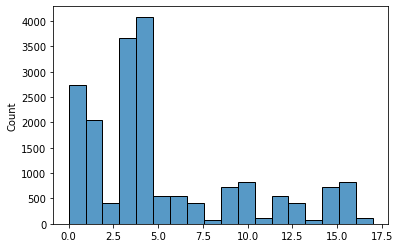

In [400]:
sns.histplot(labels, bins=18)

In [391]:
df.query('age < 30').groupby('gender').count()

,id,race,age,path,age_range
gender,,,,,
female,732,732,732,732,732
male,549,549,549,549,549


In [392]:
df.query("30 <= age < 60").groupby('gender').count()

,id,race,age,path,age_range
gender,,,,,
female,817,817,817,817,817
male,410,410,410,410,410


In [393]:
df.query('age >= 60').groupby('gender').count()

,id,race,age,path,age_range
gender,,,,,
female,109,109,109,109,109
male,83,83,83,83,83
